# 順位差による温度変化の検討

## おまじないパート

In [1]:
import sys
from pathlib import Path

# 現在のノートブックのパスを取得
notebook_dir = Path().resolve() 

# プロジェクトルートディレクトリ（notebooksディレクトリの親ディレクトリ）を取得
# プロジェクトルートは3階層上です
project_root = notebook_dir.parent.parent.parent

# プロジェクトルートをPythonの検索パスに追加
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

In [2]:
from groom import GroomAim2, \
    save_to_parquet, load_from_parquet, \
        save_model, load_model

In [3]:
self = GroomAim2()

## grooming群

### 読み込み

In [4]:
grooming_df = load_from_parquet(
    "../../../data/04_aim_2_data/01_add_label/labeled_grooming_df.parquet"
)

--- 復元完了 ---
復元されたDataFrameのshape: (35819, 17)


### 帯プロット

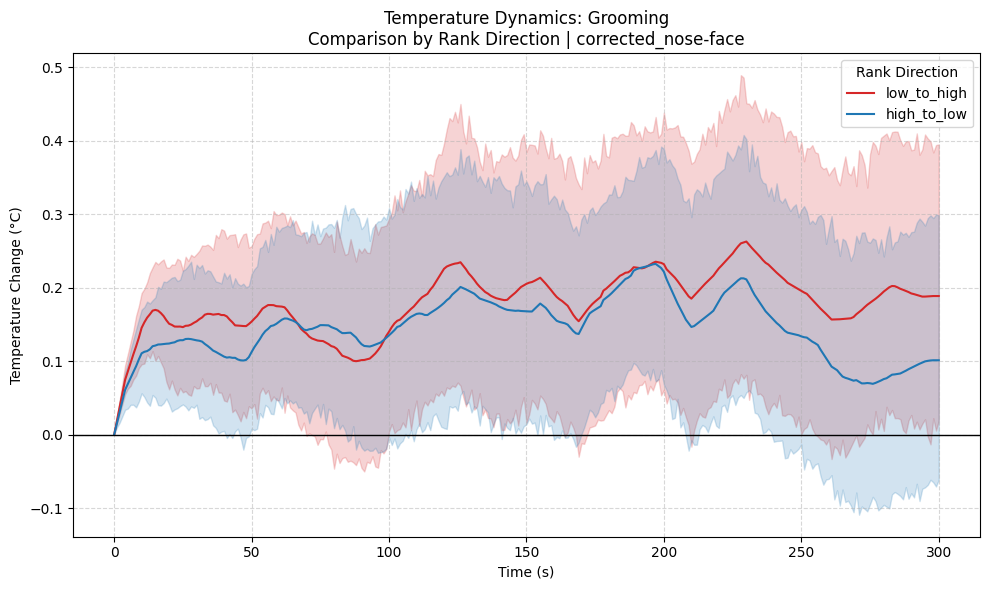

In [5]:
self.plot_direction_comparison(
    grooming_df,
    target_cols='rank_direction',
    y_column='corrected_nose-face',
    behavior_type='grooming'
)

### 検定

Running 1000 permutations for Rank Direction...

--- Cluster-based Permutation Result: High-to-Low vs Low-to-High ---
閾値を超えるクラスターは検出されませんでした。


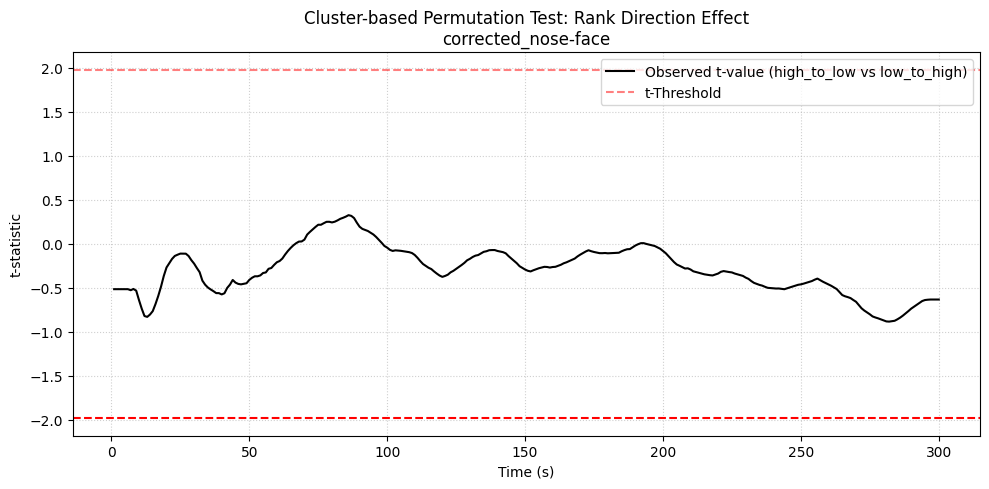

In [6]:
self.run_cluster_based_replacement_test(
    grooming_df,
    y_column='corrected_nose-face',
    target_cols='rank_direction',
    target_values=['high_to_low', 'low_to_high'],
)

## groomed群

### 読み込み

In [7]:
groomed_df = load_from_parquet(
    "../../../data/04_aim_2_data/01_add_label/labeled_groomed_df.parquet"
)

--- 復元完了 ---
復元されたDataFrameのshape: (31605, 17)


### 帯プロット

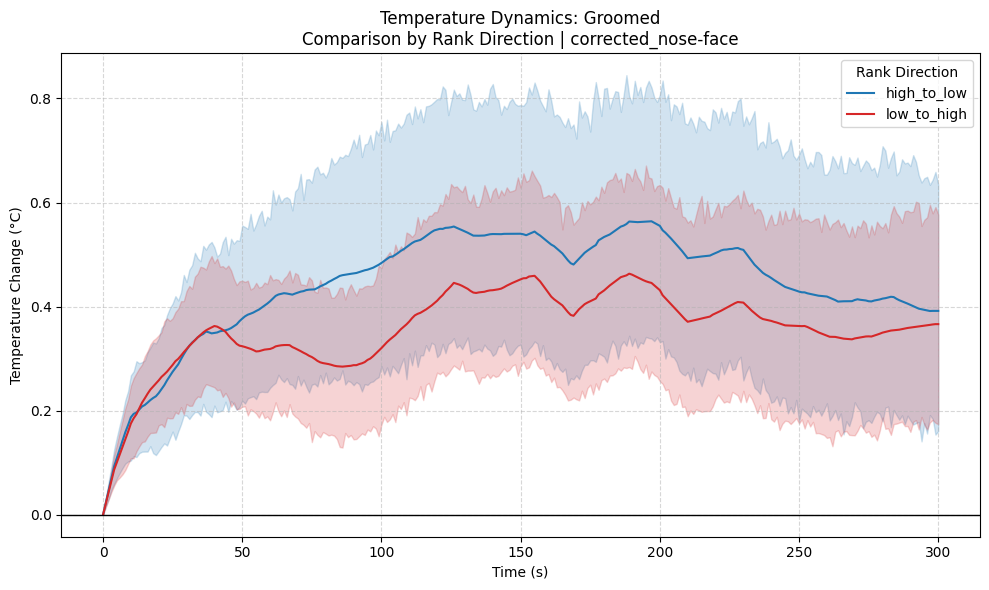

In [8]:
self.plot_direction_comparison(
    groomed_df,
    target_cols='rank_direction',
    y_column='corrected_nose-face',
    behavior_type='groomed'
)

### 検定

Running 1000 permutations for Rank Direction...

--- Cluster-based Permutation Result: High-to-Low vs Low-to-High ---
閾値を超えるクラスターは検出されませんでした。


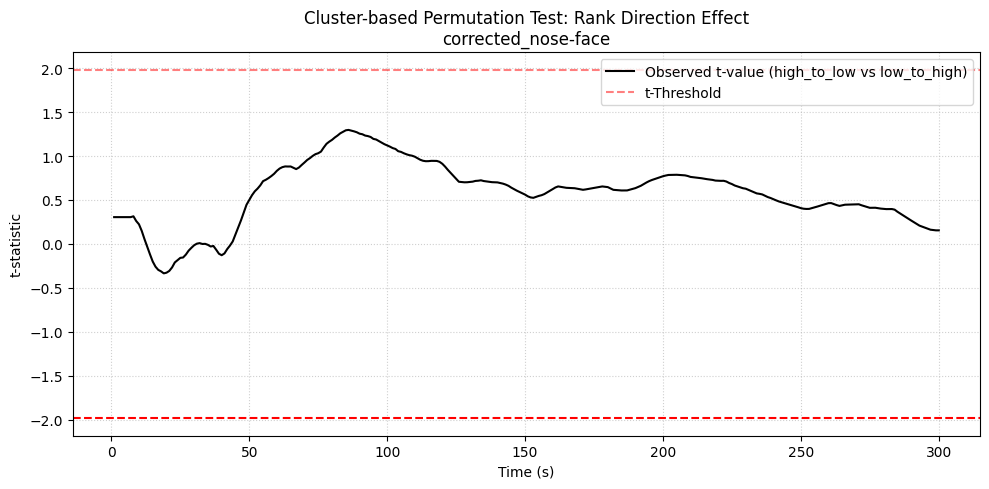

In [9]:
self.run_cluster_based_replacement_test(
    groomed_df,
    y_column='corrected_nose-face',
    target_cols='rank_direction',
    target_values=['high_to_low', 'low_to_high'],
)